In [2]:
#импортируем нужные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

testing = pd.read_csv('poker-hand-testing.data.csv', sep = ',')
training = pd.read_csv('poker-hand-training-true.data.csv', sep = ',')

import catboost as cb
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', 600)

In [3]:
#Смотрим на датасет
testing.head()

,1,1.1,1.2,13,2,4,2.1,3,1.3,12,0
0,3,12,3,2,3,11,4,5,2,5,1
1,1,9,4,6,1,4,3,2,3,9,1
2,1,4,3,13,2,13,2,1,3,6,1
3,3,10,2,7,1,2,2,11,4,9,0
4,1,3,4,5,3,4,1,12,4,6,0


In [6]:
'''
COLUMN INFO
Color — масть карты: (1-4) = {черви, пики, буби, крести}  
Rank — ранг карты: (1-13) = {туз, 2, 3, ... дама, король}

HandName - название руки:
0: Мусор 
1: Одна пара;  
2: Две пары;  
3: Тройка;  
4: Стрейт;  
5: Флэш;  
6: Фулл Хаус;  
7: Каре;  
8: Стрейт флэш;  
9: Флэш рояль;  

'''

#Переименовываем столбцы: 
testing.columns = ['Color1', 'Rank1', 'Color2', 'Rank2', 
              'Color3', 'Rank3', 'Color4', 'Rank4', 'Color5', 'Rank5',
              'HandName']
training.columns = ['Color1', 'Rank1', 'Color2', 'Rank2', 
              'Color3', 'Rank3', 'Color4', 'Rank4', 'Color5', 'Rank5',
              'HandName']
print(testing.head(5))
print(training.head(5))

   Color1  Rank1  Color2  Rank2  Color3  Rank3  Color4  Rank4  Color5  Rank5  \
0       3     12       3      2       3     11       4      5       2      5   
1       1      9       4      6       1      4       3      2       3      9   
2       1      4       3     13       2     13       2      1       3      6   
3       3     10       2      7       1      2       2     11       4      9   
4       1      3       4      5       3      4       1     12       4      6   

   HandName  
0         1  
1         1  
2         1  
3         0  
4         0  
   Color1  Rank1  Color2  Rank2  Color3  Rank3  Color4  Rank4  Color5  Rank5  \
0       2     11       2     13       2     10       2     12       2      1   
1       3     12       3     11       3     13       3     10       3      1   
2       4     10       4     11       4      1       4     13       4     12   
3       4      1       4     13       4     12       4     11       4     10   
4       1      2       1      4    

In [13]:
print(testing['Rank1'].value_counts())
print('\n',testing.shape)
print(training.shape)

6     77282
1     77251
11    77232
4     77098
13    76918
12    76918
10    76884
5     76877
2     76877
8     76838
3     76808
7     76581
9     76435
Name: Rank1, dtype: int64

 (999999, 11)
(25009, 11)


In [14]:
testing.describe()

,Color1,Rank1,Color2,Rank2,Color3,Rank3,Color4,Rank4,Color5,Rank5,HandName
count,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000
mean,2.500495,6.997933,2.499895,7.006091,2.500872,6.998876,2.500394,7.002302,2.499452,6.989476,0.616903
std,1.117767,3.743371,1.118568,3.743478,1.118225,3.741891,1.117246,3.741270,1.118948,3.739893,0.773377
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,4.000000,1.000000,4.000000,1.000000,4.000000,2.000000,4.000000,1.000000,4.000000,0.000000
50%,3.000000,7.000000,3.000000,7.000000,3.000000,7.000000,3.000000,7.000000,2.000000,7.000000,0.000000
75%,3.000000,10.000000,4.000000,10.000000,4.000000,10.000000,3.000000,10.000000,4.000000,10.000000,1.000000
max,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,9.000000


In [18]:
print('Количество комбинаций в датасете:')
print(testing.groupby('HandName').size())
print('\n',training.groupby('HandName').size())

Количество комбинаций в датасете:
HandName
0    501208
1    422498
2     47622
3     21121
4      3885
5      1996
6      1424
7       230
8        12
9         3
dtype: int64

 HandName
0    12493
1    10599
2     1206
3      513
4       93
5       54
6       36
7        6
8        5
9        4
dtype: int64


In [11]:
myCorrelation = testing.corr()

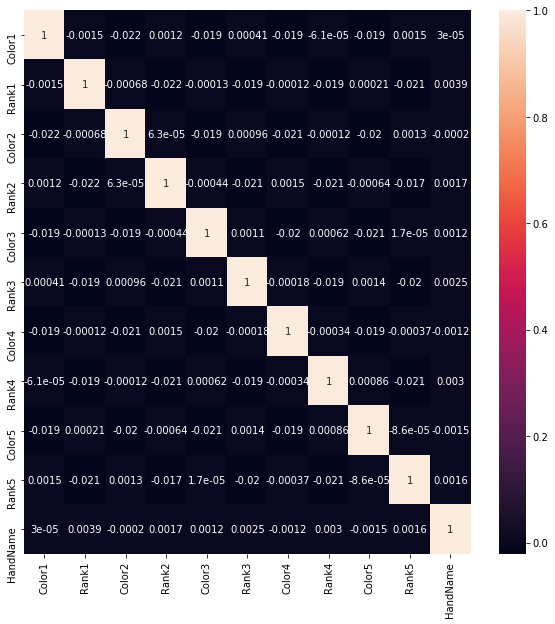

In [14]:
plt.figure(figsize = (10,10))
sns.heatmap(myCorrelation, annot = True)

In [17]:
testing.head(15)

,Color1,Rank1,Color2,Rank2,Color3,Rank3,Color4,Rank4,Color5,Rank5,HandName
0,3,12,3,2,3,11,4,5,2,5,1
1,1,9,4,6,1,4,3,2,3,9,1
2,1,4,3,13,2,13,2,1,3,6,1
3,3,10,2,7,1,2,2,11,4,9,0
4,1,3,4,5,3,4,1,12,4,6,0
5,2,6,4,11,2,3,4,9,1,7,0
6,3,2,4,9,3,7,4,3,4,5,0
7,4,4,3,13,1,8,3,9,3,10,0
8,1,9,3,8,4,4,1,7,3,5,0
9,4,7,3,12,1,13,1,9,2,6,0


In [20]:
testing = testing.sort_values(['HandName'], ascending = False)
testing.head(15)

,Color1,Rank1,Color2,Rank2,Color3,Rank3,Color4,Rank4,Color5,Rank5,HandName
61842,4,12,4,1,4,13,4,11,4,10,9
944521,4,1,4,11,4,10,4,12,4,13,9
289230,2,10,2,11,2,13,2,1,2,12,9
388598,2,8,2,7,2,5,2,6,2,4,8
991930,4,10,4,12,4,9,4,11,4,13,8
509064,2,12,2,11,2,13,2,9,2,10,8
616200,1,8,1,7,1,11,1,10,1,9,8
388801,4,11,4,7,4,9,4,10,4,8,8
795037,3,13,3,11,3,12,3,10,3,9,8
951420,1,7,1,3,1,6,1,5,1,4,8


## Пробуем катбуст

In [20]:
#Разделяем на Х, Xte - весь датасет без таргет признака
#y, yte - только наблюдения-таргет признаки

X = training.drop(['HandName'],axis=1)
y = training.HandName
Xte = testing.drop(['HandName'],axis=1)
yte = testing.HandName

Object `cat.fit()` not found.


In [29]:
#CatBoost - пробуем метод классификации
#random_state = seed, оставить значение 23 для возможности повтора метода
#CROSS-VALIDATION AND PREDICTION
def CVandPRED (X, y, Xte, yte):
    #Кросс-валидация: 20% отрываем, смотрим на 80% 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 23)
    
    #Объявляем КатБуст, заносим логику метода в переменную CatBoo
    #Loss Function = формула-условие для подсчетов
    catBoo = cb.CatBoostClassifier(loss_function = 'MultiClassOneVsAll',
                                  random_seed = 23) 
   
    cat_predClass = cat_model.predict(X_test, prediction_type = 'Class')
    cat_predProb = cat_model.predict(X_test, prediction_type = 'Probability')

    print("Test accuracy: {}".format(accuracy_score(yte,cat_predClass)))
    print("Test logloss: {}".format(log_loss(yte,cat_predProb)))
    
    #Треним со всеми Х и y, Тестим со всеми Xte, yte:
    cat_model = catBoo.fit(X, y, verbose=False)

    cat_predClassT = cat_model.predict(Xte, prediction_type='Class')
    cat_predProbT = cat_model.predict(Xte, prediction_type='Probability')

    print("Test accuracy: {}".format(accuracy_score(yte,cat_predClassT)))
    print("Test logloss: {}".format(log_loss(yte,cat_predProbT)))
    
    return (cat_predClass, cat_predProb, cat_predClassT, cat_predProbT)

In [ ]:
#Поехали
cat_predClass, cat_predProb, cat_predClassT, cat_predProbT = CVandPRED(X, y, Xte, yte)

In [ ]:
#Порисуем, авось что выйдет даже (я не верю)
plt.hist((np.reshape(cat_predClassT,(yte.shape[0],)),yte),bins = 10, log=True, color = ['Red', 'Green'])
plt.legend(labels=('Предсказания','Тест дата'))
plt.show()